<a href="https://colab.research.google.com/github/Irin-mathew/Player_Performance_analyzer-/blob/main/player_ve1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Wed Jul  9 05:44:15 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   43C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)
!pip install -q ultralytics roboflow

/content
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 115.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 125.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [3]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

/content/datasets


In [4]:
from google.colab import userdata
from IPython.display import Image
!pip install ipython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 3.6 MB/s eta 0:00:00


In [7]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="DMdkNZ4CMz4wZInH0uVT")
project = rf.workspace("irin-mathew-3v7dy").project("football-players-detection-3zvbc-83jzs")
version = project.version(3)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to football-players-detection-3 in yolov8:: 100%|██████████| 756/756 [00:00<00:00, 2500.68it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [8]:
!sed -i 's|\(train: \).*|\1../train/images|' {dataset.location}/data.yaml
!sed -i 's|\(val: \).*|\1../valid/images|' {dataset.location}/data.yaml

In [9]:
# Correct the paths in data.yaml
!sed -i 's|\(train: \).*|\1../train/images|' {dataset.location}/data.yaml
!sed -i 's|\(val: \).*|\1../valid/images|' {dataset.location}/data.yaml
!sed -i 's|\(test: \).*|\1../test/images|' {dataset.location}/data.yaml  # If you have a test set

In [10]:
with open(f"{dataset.location}/data.yaml", 'r') as f:
    print(f.read())

names:
- ball
- goalkeeper
- player
- referee
nc: 4
roboflow:
  license: CC BY 4.0
  project: football-players-detection-3zvbc-83jzs
  url: https://universe.roboflow.com/irin-mathew-3v7dy/football-players-detection-3zvbc-83jzs/dataset/3
  version: 3
  workspace: irin-mathew-3v7dy
test: ../test/images
train: ../train/images
val: ../valid/images



In [11]:
!yolo task=detect mode=train model=yolov8x.pt data={dataset.location}/data.yaml batch=2 epochs=50 imgsz=960 plots=True amp=True

100% 131M/131M [00:00<00:00, 314MB/s]
Ultralytics 8.3.163 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=2, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/football-players-detection-3/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=960, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8x.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True,

In [12]:
!ls runs/detect/train/

args.yaml			 labels.jpg	      train_batch5962.jpg
BoxF1_curve.png			 results.csv	      val_batch0_labels.jpg
BoxP_curve.png			 results.png	      val_batch0_pred.jpg
BoxPR_curve.png			 train_batch0.jpg     val_batch1_labels.jpg
BoxR_curve.png			 train_batch1.jpg     val_batch1_pred.jpg
confusion_matrix_normalized.png  train_batch2.jpg     val_batch2_labels.jpg
confusion_matrix.png		 train_batch5960.jpg  val_batch2_pred.jpg
labels_correlogram.jpg		 train_batch5961.jpg  weights


In [13]:
!ls /content/datasets/runs/detect/train/weights

best.pt  last.pt


In [20]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [21]:
!cp /content/runs/detect/train/weights/best.pt /content/drive/MyDrive/


cp: cannot stat '/content/runs/detect/train/weights/best.pt': No such file or directory


In [14]:
# List the contents of the directory to check if the file exists
!ls {HOME}/datsaset/runs/detect/train/

ls: cannot access '/content/datsaset/runs/detect/train/': No such file or directory


/content


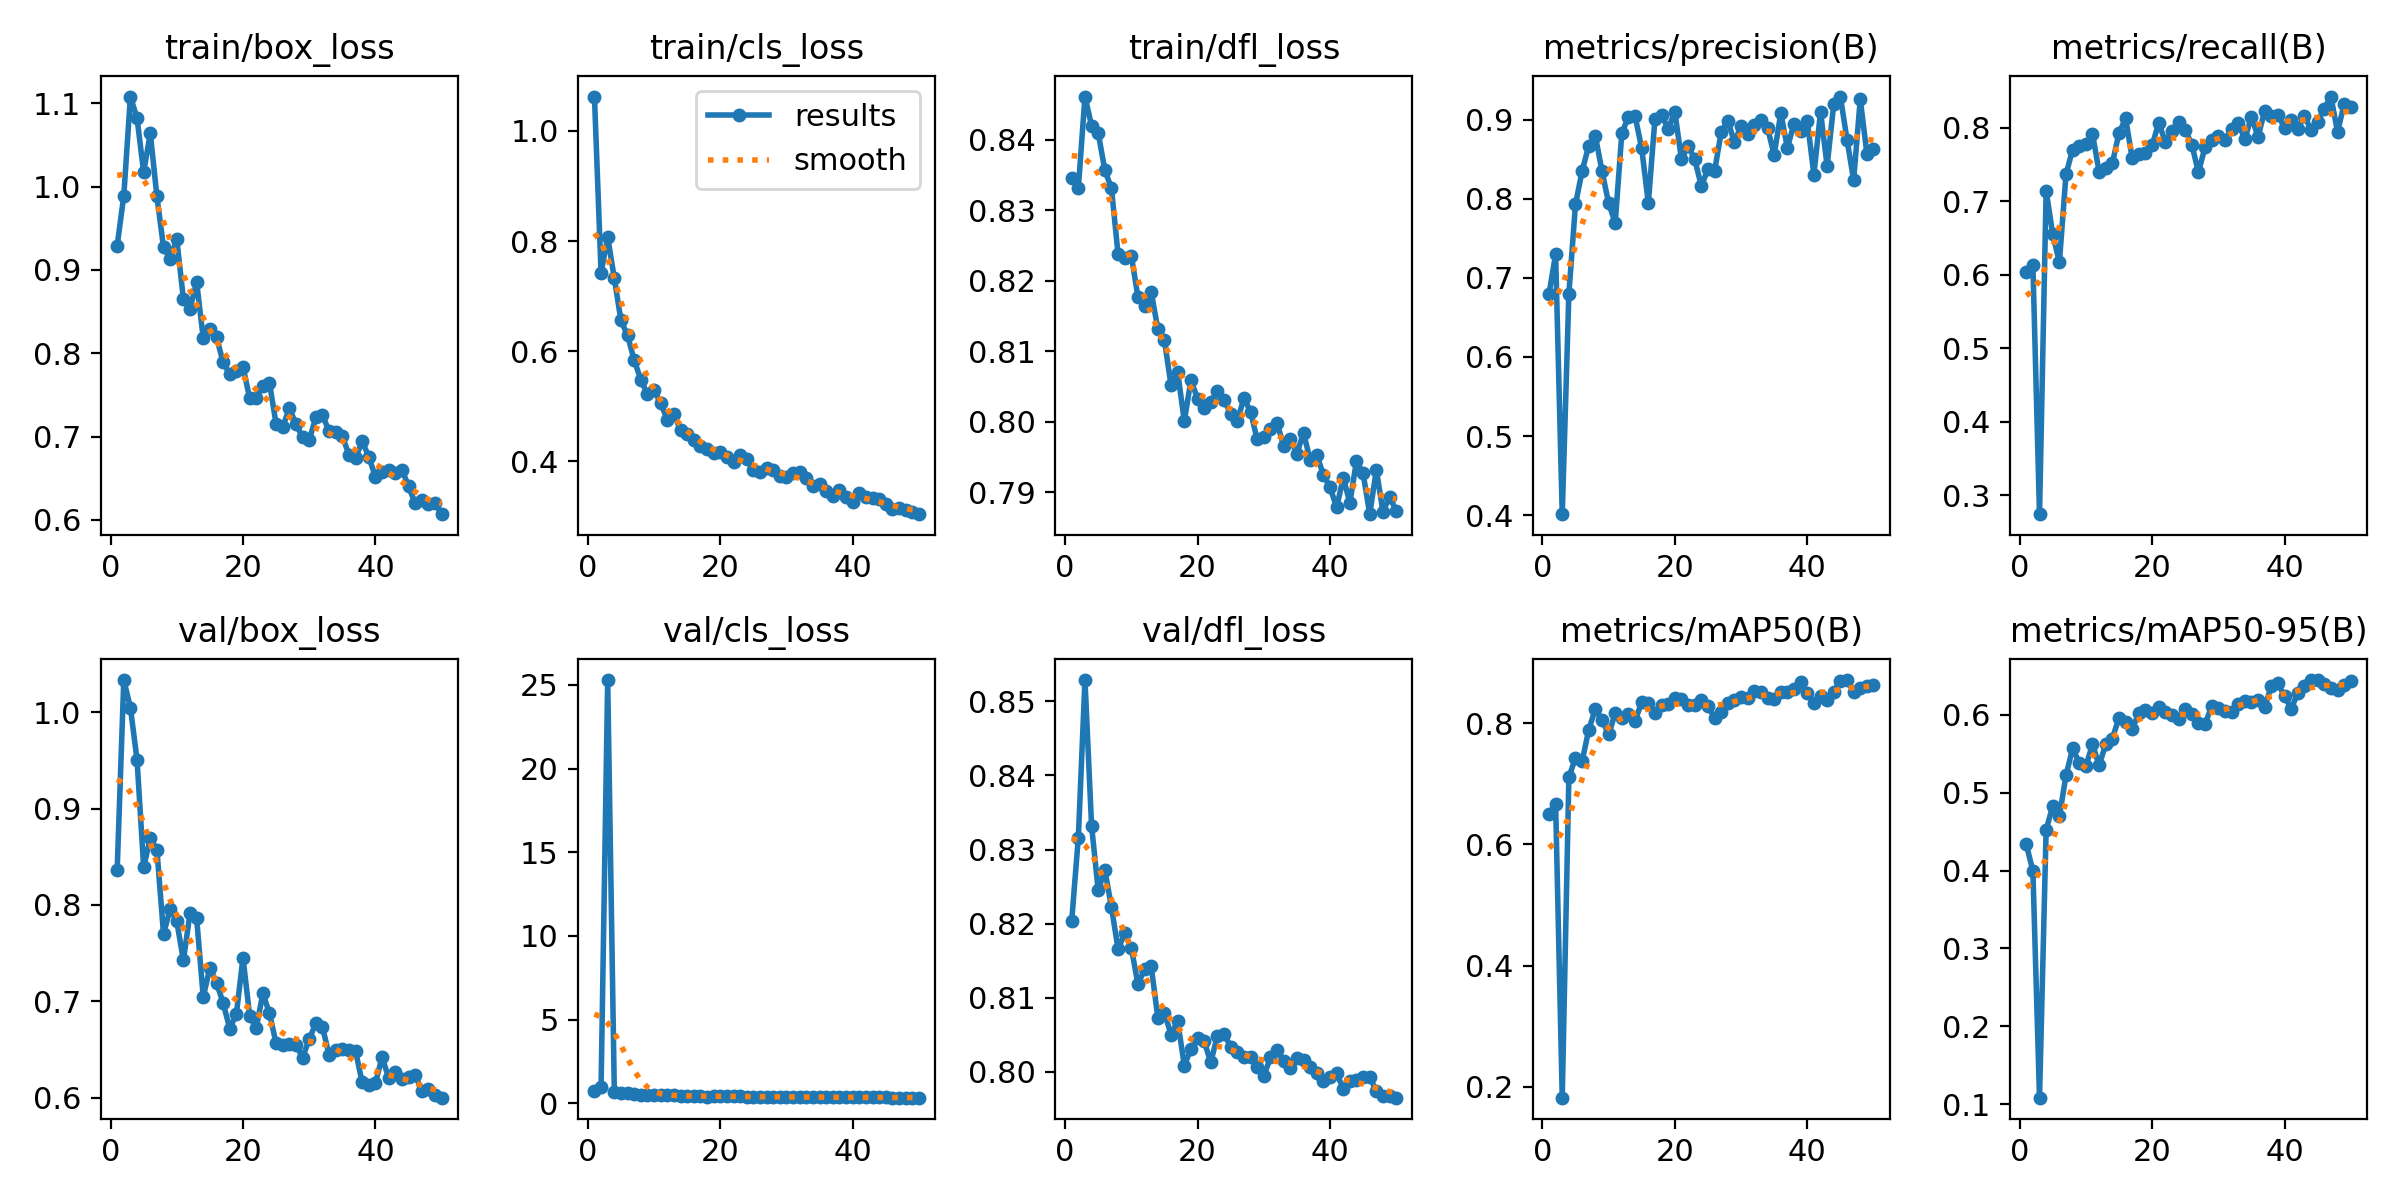

In [22]:
# Change to the HOME directory
%cd $HOME

# Display the results image
from IPython.display import Image, display

# Correct path to the image
image_path = f'{HOME}/datasets/runs/detect/train/results.png'

# Display the image
display(Image(filename=image_path, width=600))

/content


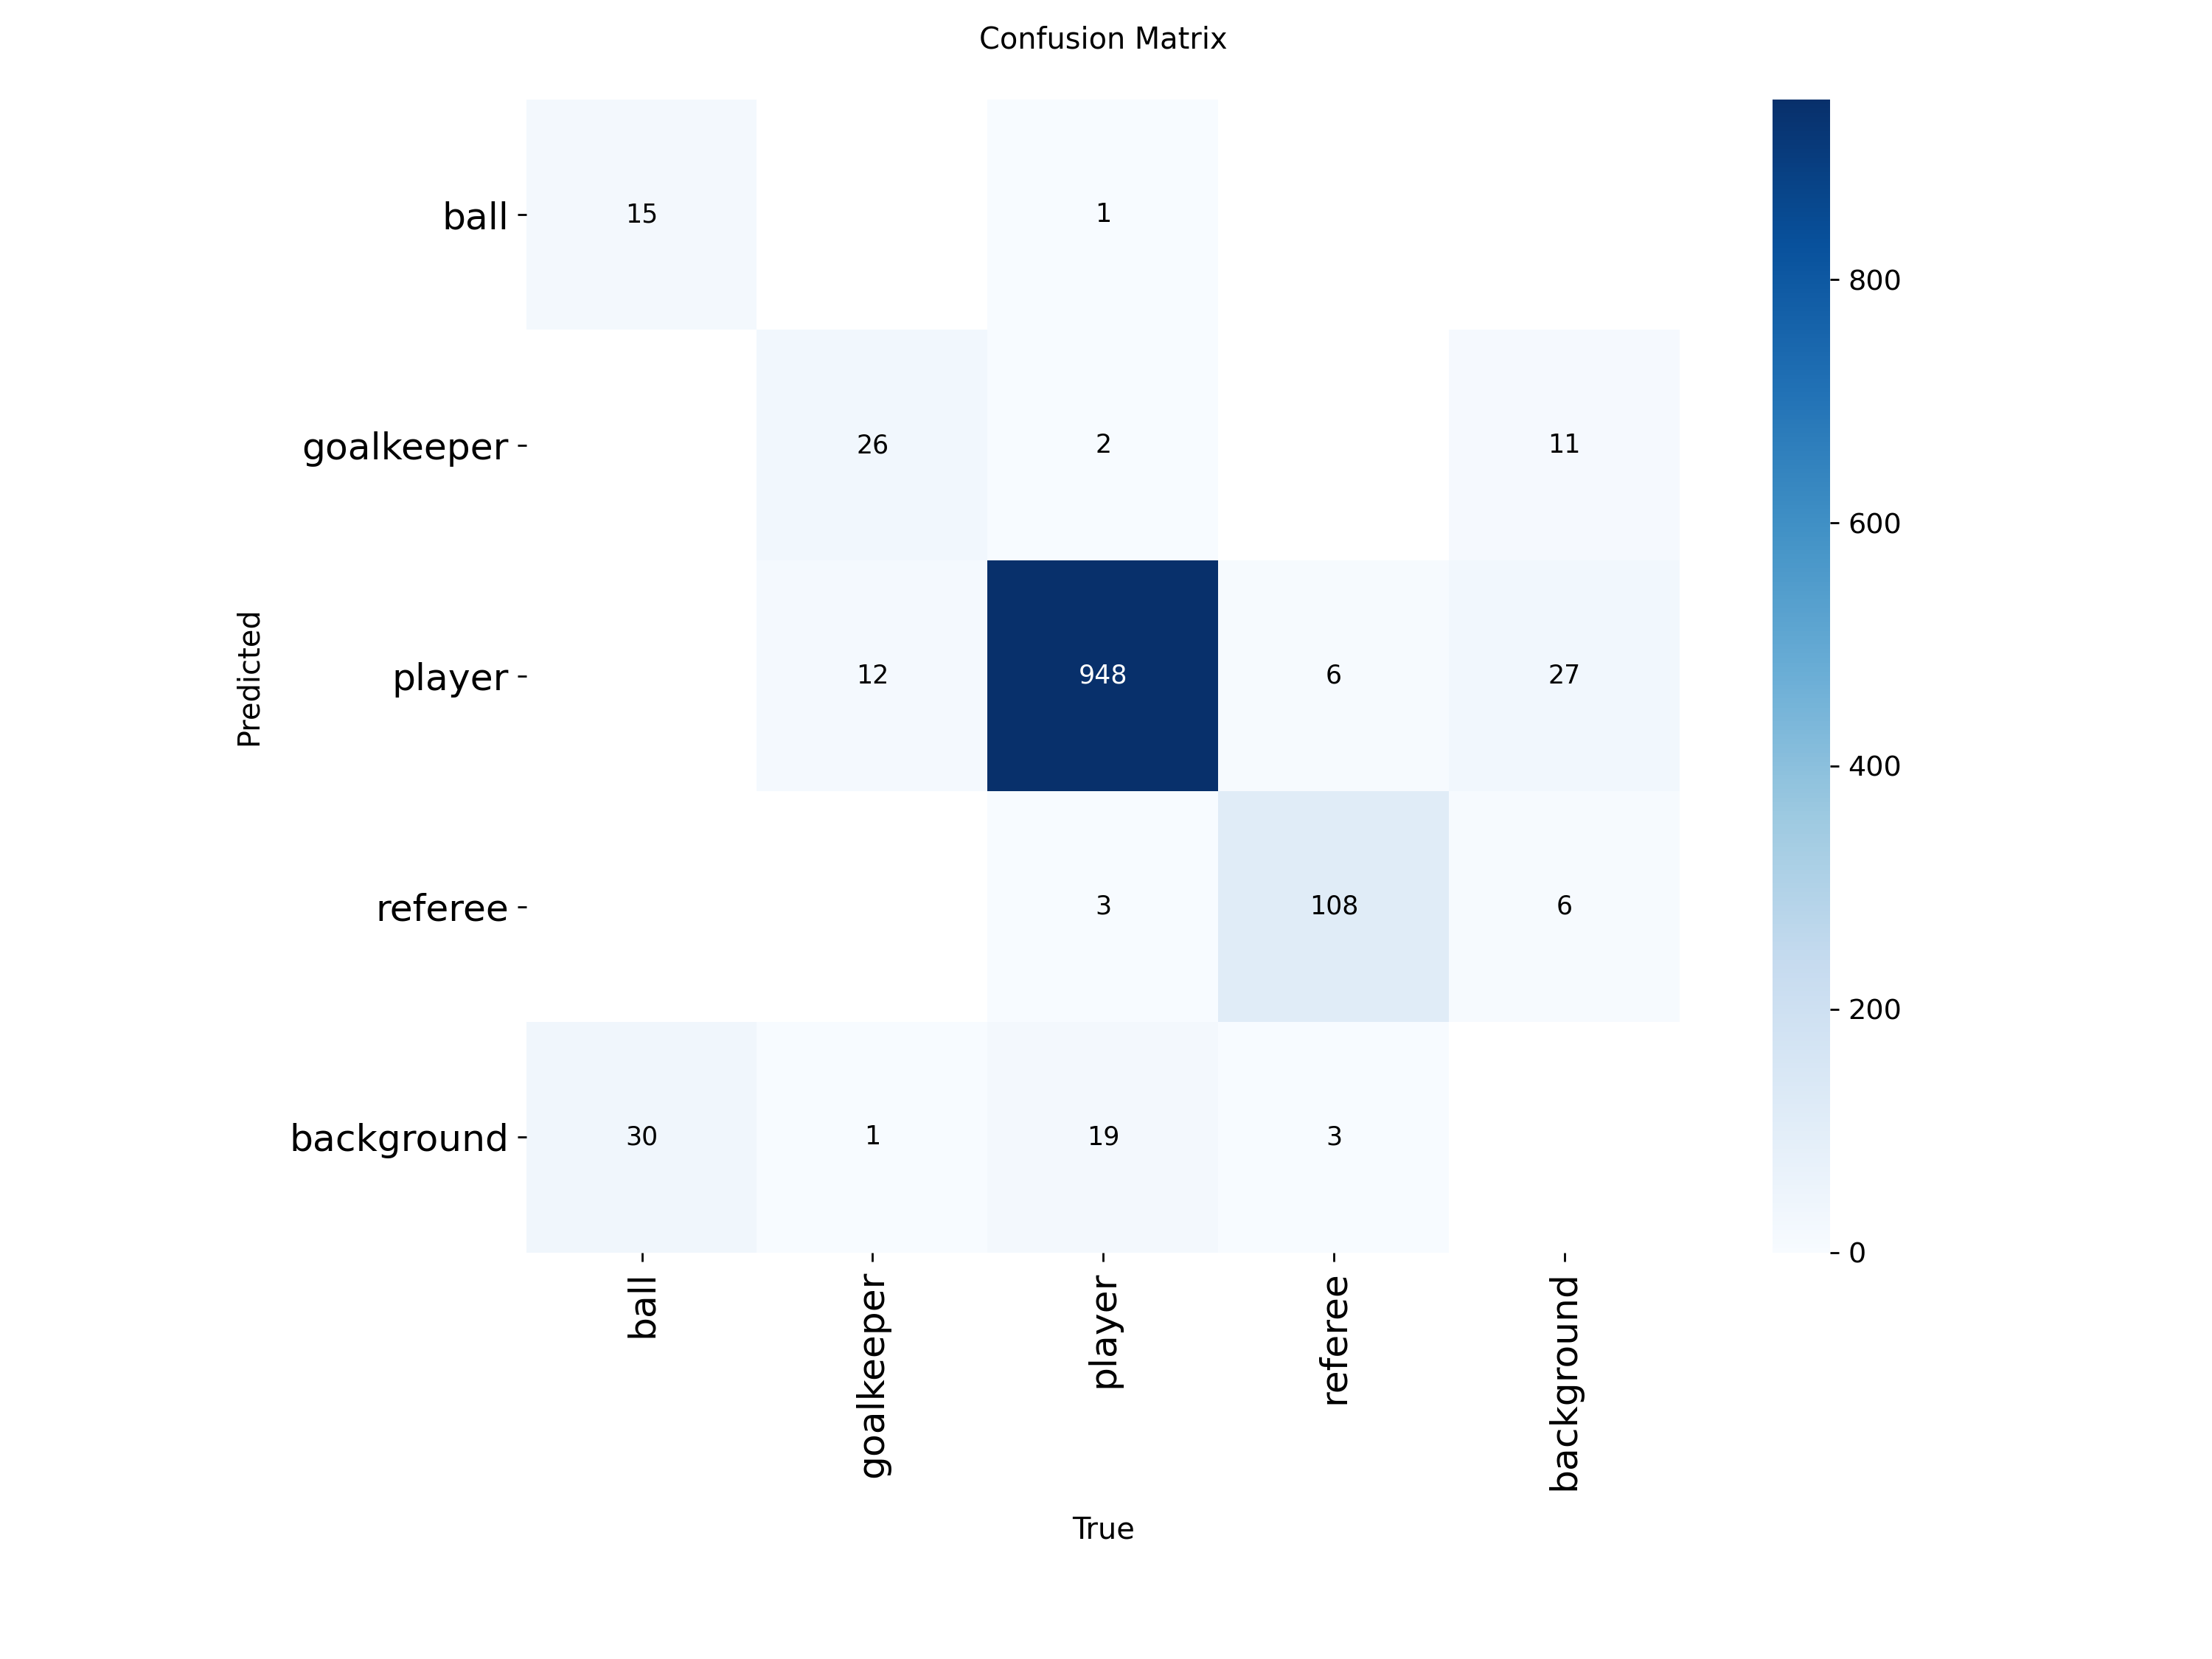

In [23]:
# Change to the HOME directory
%cd $HOME

# Import necessary libraries
from IPython.display import Image, display
import os

# Define the path to the confusion matrix image
image_path = f'{HOME}/datasets/runs/detect/train/confusion_matrix.png'

# Check if the file exists and display the image
if os.path.exists(image_path):
    display(Image(filename=image_path, width=600))
else:
    print(f"File not found: {image_path}")

/content


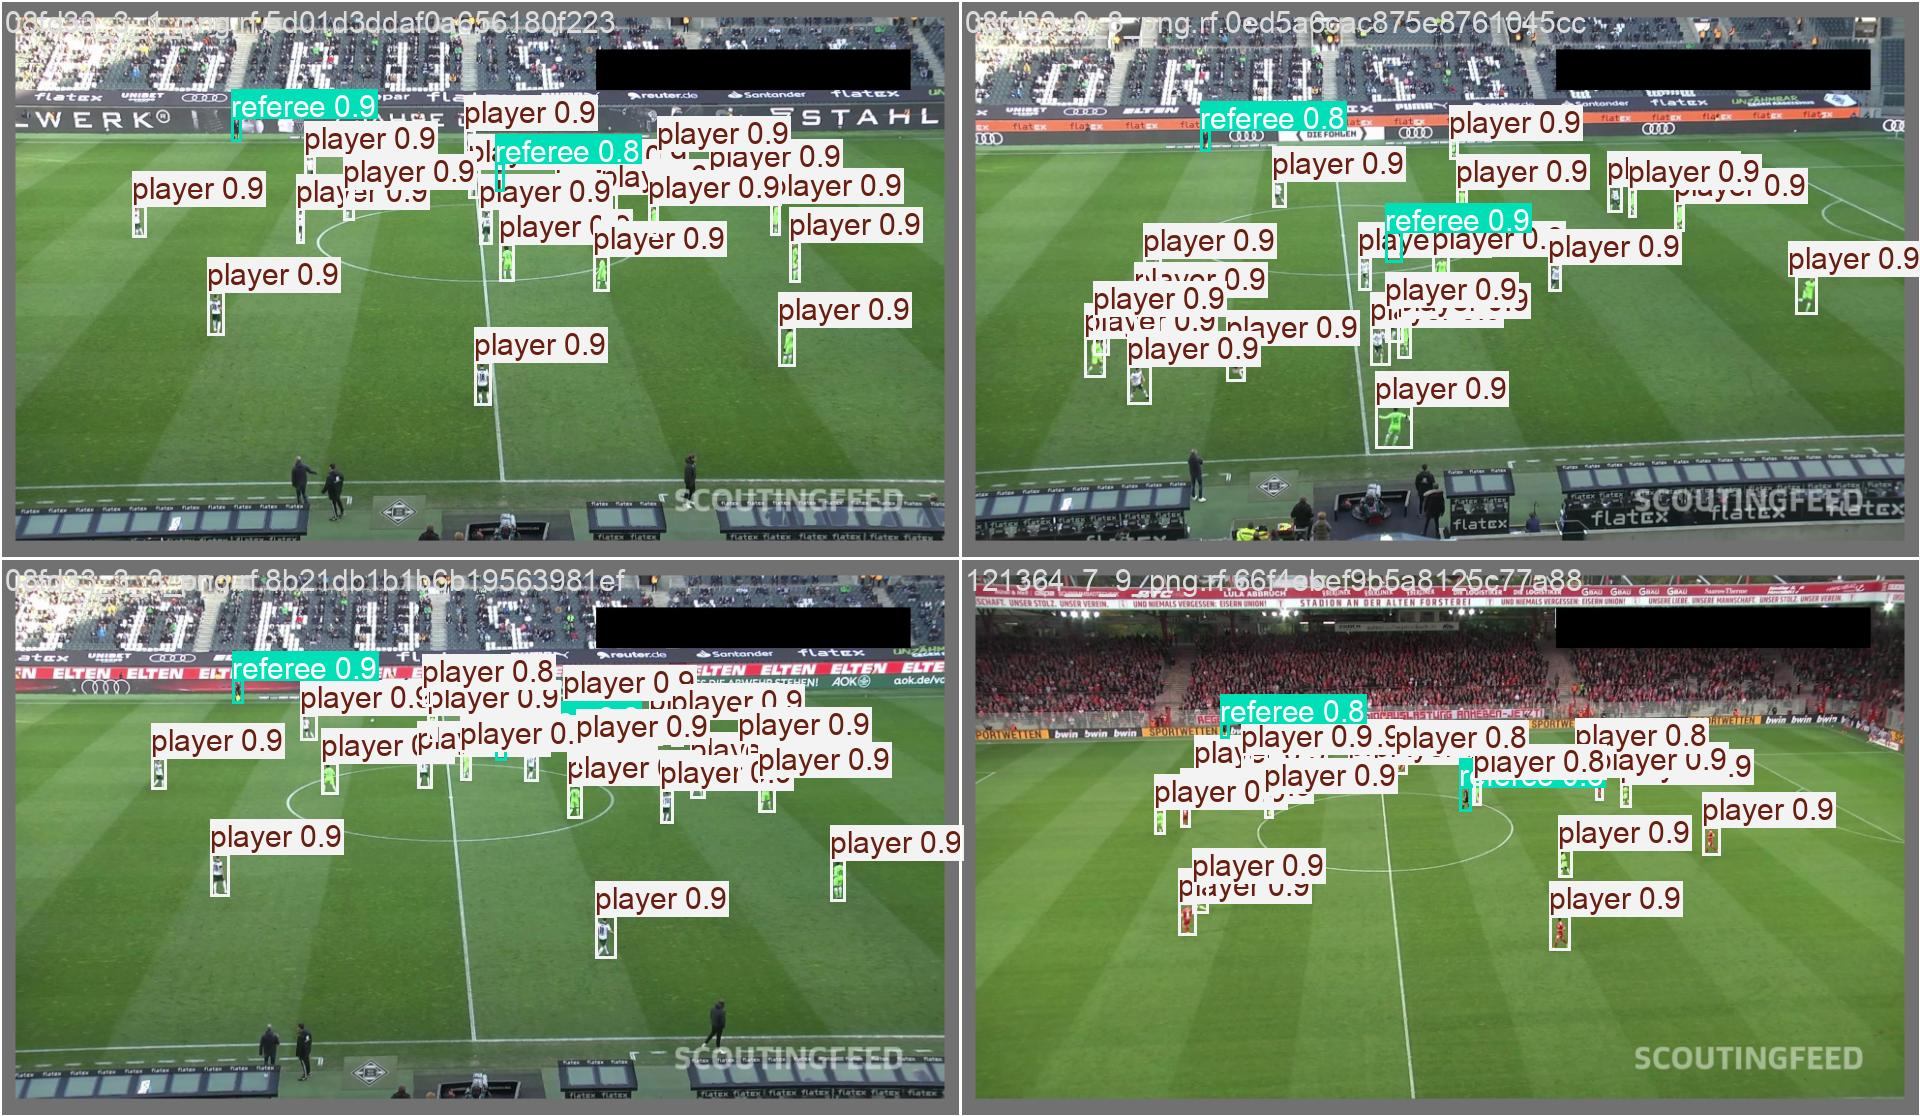

In [24]:
# Change to the HOME directory
%cd $HOME

# Import necessary libraries
from IPython.display import Image, display
import os

# Define the path to the validation batch prediction image
image_path = f'{HOME}/datasets/runs/detect/train/val_batch0_pred.jpg'

# Check if the file exists and display the image
if os.path.exists(image_path):
    display(Image(filename=image_path, width=600))
else:
    print(f"File not found: {image_path}")

In [25]:
# Change to the HOME directory
%cd $HOME

# Run the YOLO validation command with a different image size
!yolo task=detect mode=val model={HOME}/datasets/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml imgsz=960

/content
Ultralytics 8.3.163 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 68,127,420 parameters, 0 gradients, 257.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2414.7±1576.6 MB/s, size: 234.9 KB)
val: Scanning /content/datasets/football-players-detection-3/valid/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100% 49/49 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:04<00:00,  1.23s/it]
                   all         49       1174      0.929      0.808      0.873       0.65
                  ball         45         45      0.943      0.365      0.591      0.254
            goalkeeper         38         39      0.886      0.923      0.931      0.763
                player         49        973      0.947      0.979      0.989      0.848
               referee         49        117      0.941      0.962      0.983      0.733
Speed: 5.7ms preproce

In [ ]:
pip install roboflow

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/datasets/runs/detect/train/")

Dependency ultralytics==8.0.196 is required but found version=8.3.95, to fix: `pip install ultralytics==8.0.196`
Would you like to continue with the wrong version of ultralytics? y/n: y
View the status of your deployment at: https://app.roboflow.com/irin-mathew-3v7dy/football-players-detection-3zvbc-83jzs/3
Share your model with the world at: https://universe.roboflow.com/irin-mathew-3v7dy/football-players-detection-3zvbc-83jzs/model/3


Saving to drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!mkdir -p "/content/gdrive/My Drive/My Models"